In [38]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


# Pyspark for handling big data
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession


In [2]:
# importing the dataset
file_path = "ddos_balanced/final_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

   Unnamed: 0                               Flow ID         Src IP  Src Port  \
0         624  192.168.4.118-203.73.24.75-4504-80-6  192.168.4.118      4504   
1         625  192.168.4.118-203.73.24.75-4504-80-6  192.168.4.118      4504   
2         626  192.168.4.118-203.73.24.75-4505-80-6  192.168.4.118      4505   
3         627  192.168.4.118-203.73.24.75-4505-80-6  192.168.4.118      4505   
4         628  192.168.4.118-203.73.24.75-4506-80-6  192.168.4.118      4506   

         Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0  203.73.24.75        80         6  12/06/2010 08:34:32 AM        3974862   
1  203.73.24.75        80         6  12/06/2010 08:34:36 AM             63   
2  203.73.24.75        80         6  12/06/2010 08:34:36 AM         476078   
3  203.73.24.75        80         6  12/06/2010 08:34:37 AM            151   
4  203.73.24.75        80         6  12/06/2010 08:34:37 AM         472507   

   Tot Fwd Pkts  ...  Fwd Seg Size Min  Active Mea

In [22]:
# Printing the first 100 samples

# Select the first 100 samples
subset_data = df.head(100)


# Save this subset to a new CSV file
subset_data.to_csv('first_100_samples.csv', index=False)

In [3]:
# Verifying the Dataset

# This tells you the number of rows and columns in the dataset.
print("Dataset Shape:", df.shape)

# The .info() method provides a concise summary of your DataFrame, including the number of non-null values in each column and the data type.
df.info()

# You can get a quick statistical summary of the numerical columns using .describe().
print(df.describe())


Dataset Shape: (12794627, 85)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794627 entries, 0 to 12794626
Data columns (total 85 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Flow ID            object 
 2   Src IP             object 
 3   Src Port           int64  
 4   Dst IP             object 
 5   Dst Port           int64  
 6   Protocol           int64  
 7   Timestamp          object 
 8   Flow Duration      int64  
 9   Tot Fwd Pkts       int64  
 10  Tot Bwd Pkts       int64  
 11  TotLen Fwd Pkts    float64
 12  TotLen Bwd Pkts    float64
 13  Fwd Pkt Len Max    float64
 14  Fwd Pkt Len Min    float64
 15  Fwd Pkt Len Mean   float64
 16  Fwd Pkt Len Std    float64
 17  Bwd Pkt Len Max    float64
 18  Bwd Pkt Len Min    float64
 19  Bwd Pkt Len Mean   float64
 20  Bwd Pkt Len Std    float64
 21  Flow Byts/s        float64
 22  Flow Pkts/s        float64
 23  Flow IAT Mean      float64
 24  Flow IAT Std      

c:\PSUT\S9\AI & ML\Project\venv\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\PSUT\S9\AI & ML\Project\venv\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


         Unnamed: 0      Src Port      Dst Port      Protocol  Flow Duration  \
count  1.279463e+07  1.279463e+07  1.279463e+07  1.279463e+07   1.279463e+07   
mean   2.662390e+06  3.707054e+04  1.464290e+04  7.828588e+00   8.219593e+06   
std    2.169382e+06  2.521985e+04  2.306383e+04  4.206168e+00   2.477327e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  -1.000000e+00   
25%    8.984830e+05  4.430000e+02  8.000000e+01  6.000000e+00   1.262000e+03   
50%    2.040991e+06  5.059200e+04  8.000000e+01  6.000000e+00   3.206500e+04   
75%    3.903946e+06  5.621500e+04  3.855000e+04  6.000000e+00   4.159736e+06   
max    7.902474e+06  6.553500e+04  6.553500e+04  1.700000e+01   1.200000e+08   

       Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
count  1.279463e+07  1.279463e+07     1.279463e+07     1.279463e+07   
mean   2.719636e+01  4.974281e+00     1.125726e+03     3.264955e+03   
std    1.720577e+03  2.509204e+02     5.479157e+04     5.387678e+0

Based on the output you've shared, it seems like you've successfully loaded a large dataset with 12,794,627 entries and 85 columns. The output from df.describe() gives a statistical summary of the numerical columns, which is a good starting point for understanding the data. Let's analyze the output and the next steps:

Analysis of the Output
Data Size: The dataset is large **(12,794,627 entries)**, which suggests that you might need efficient data handling and processing techniques, especially if working on a machine with limited memory.

Columns: There are **85 columns**, a mix of different data types (int64, float64, and object).

Memory Usage: The dataset is approximately 8.1 GB in memory, which is quite substantial. Make sure your machine has enough memory to handle this dataset and the operations you plan to perform on it.

Warnings: The RuntimeWarning messages suggest that there might be some **NaN or infinite values** in your data, affecting operations like subtraction.

Statistical Summary: df.describe() provides key statistics like mean, standard deviation, min, max, and quartiles for numerical columns. This is useful for getting a sense of the data distribution and scale.

**Next Steps**
Data Cleaning and Preprocessing:

**Handle Missing Values**: Check for NaN or missing values using df.isna().sum() and decide how to handle them (e.g., imputation, removal).
Infinite Values: Investigate columns with infinite or extreme values and decide how to handle them.

**Exploratory Data Analysis (EDA)**:
Visualize the distributions of various features to better understand the data.
Investigate the relationships between features, especially with respect to the target variable Label.

**Feature Engineering**:
Based on your understanding of the data, consider creating new features that might be more informative for your model.
Consider dropping irrelevant or redundant columns.

**Data Transformation**:
Normalize or standardize numerical features.
Encode categorical features if necessary.

**Model Preparation**:
Split the data into training and testing sets.
If the dataset is too large to train effectively, consider using a sample or employing strategies to handle large datasets, like batch processing.

**Model Building**:
Start with a simple model to establish a baseline.
Gradually move to more complex models and compare their performance.

**Performance Evaluation**:
Use appropriate metrics to evaluate your model's performance (accuracy, precision, recall, F1-score, ROC-AUC, etc.).

**Iterative Improvement**:
Based on model performance, iterate over the above steps to improve the model.
Given the size and complexity of your dataset, these steps will be resource-intensive. Ensure that you have sufficient computational resources, and consider using cloud-based services or optimized libraries for large-scale data processing if needed.

In [12]:
# standardization or normalization (Not needed for random forest)

# Replace infinite values with NaN
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)

# Impute NaN values (Optional based on your preference)
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Initialize scalers
scaler_standard = StandardScaler()
scaler_normalize = MinMaxScaler()

# Skewness threshold for deciding between standardization and normalization
skewness_threshold = 1.0 # This is adjustable

# Assess each column and suggest action
suggested_actions = {}
for col in numeric_cols:
    skewness = df[col].skew()
    if abs(skewness) > skewness_threshold:
        suggested_actions[col] = 'Normalize'
    else:
        suggested_actions[col] = 'Standardize'

# Display suggestions
print("Suggested Actions based on Skewness:")
for col, action in suggested_actions.items():
    print(f"{col}: {action}")

# Ask for user confirmation
confirmation = input("\nDo you want to proceed with these actions? (yes/no): ").lower()

# Apply scaling based on user confirmation
if confirmation == 'yes':
    for col, action in suggested_actions.items():
        if action == 'Normalize':
            df[col] = scaler_normalize.fit_transform(df[[col]])
        elif action == 'Standardize':
            df[col] = scaler_standard.fit_transform(df[[col]])
    print("Scaling applied as per suggestions.")
else:
    print("No scaling applied.")

Suggested Actions based on Skewness:
Unnamed: 0: Standardize
Src Port: Standardize
Dst Port: Normalize
Protocol: Normalize
Flow Duration: Normalize
Tot Fwd Pkts: Normalize
Tot Bwd Pkts: Normalize
TotLen Fwd Pkts: Normalize
TotLen Bwd Pkts: Normalize
Fwd Pkt Len Max: Normalize
Fwd Pkt Len Min: Normalize
Fwd Pkt Len Mean: Normalize
Fwd Pkt Len Std: Normalize
Bwd Pkt Len Max: Normalize
Bwd Pkt Len Min: Normalize
Bwd Pkt Len Mean: Normalize
Bwd Pkt Len Std: Normalize
Flow Byts/s: Normalize
Flow Pkts/s: Normalize
Flow IAT Mean: Normalize
Flow IAT Std: Normalize
Flow IAT Max: Normalize
Flow IAT Min: Normalize
Fwd IAT Tot: Normalize
Fwd IAT Mean: Normalize
Fwd IAT Std: Normalize
Fwd IAT Max: Normalize
Fwd IAT Min: Normalize
Bwd IAT Tot: Normalize
Bwd IAT Mean: Normalize
Bwd IAT Std: Normalize
Bwd IAT Max: Normalize
Bwd IAT Min: Normalize
Fwd PSH Flags: Normalize
Bwd PSH Flags: Normalize
Fwd URG Flags: Standardize
Bwd URG Flags: Standardize
Fwd Header Len: Normalize
Bwd Header Len: Normalize
F

In [4]:
# Analyzing the code for missing and inifinite values

# Set thresholds
MISSING_VALUES_COLUMN_THRESHOLD = 0.5  # 50% of data missing
INFINITE_VALUES_THRESHOLD = 0.1        # 10% of data is infinite
MISSING_VALUES_ROW_THRESHOLD = 0.5     # 50% of data missing

# Calculate missing values
missing_values = df.isna().sum()
total_values = len(df)
missing_percentages = missing_values / total_values

# Initialize lists
columns_to_drop = []
columns_for_imputation = []

# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate infinite values only for numeric columns
infinite_values = np.isinf(df[numeric_cols]).sum()
infinite_percentages = infinite_values / total_values

# Analyze columns for missing and infinite values
for column in df.columns:
    missing_percentage = missing_percentages[column]
    infinite_percentage = infinite_percentages[column] if column in numeric_cols else 0

    if missing_percentage > MISSING_VALUES_COLUMN_THRESHOLD or infinite_percentage > INFINITE_VALUES_THRESHOLD:
        columns_to_drop.append(column)
    elif 0 < missing_percentage <= MISSING_VALUES_COLUMN_THRESHOLD or (0 < infinite_percentage <= INFINITE_VALUES_THRESHOLD and column in numeric_cols):
        columns_for_imputation.append(column)

# Analyze rows for missing values
rows_to_drop = df.index[df.isna().sum(axis=1) / df.shape[1] > MISSING_VALUES_ROW_THRESHOLD].tolist()

# Print results
print("\nColumns with High Missing/Infinite Values (To Drop):")
print(columns_to_drop)

print("\nColumns with Moderate Missing/Infinite Values (Consider Imputation):")
print(columns_for_imputation)

print(f"\nTotal Number of Rows to Drop: {len(rows_to_drop)}")

# Example actions based on the suggestions (uncomment to use)
# df.drop(columns=columns_to_drop, inplace=True)
# df.drop(index=rows_to_drop, inplace=True)


Columns with High Missing/Infinite Values (To Drop):
[]

Columns with Moderate Missing/Infinite Values (Consider Imputation):
['Flow Byts/s', 'Flow Pkts/s']

Total Number of Rows to Drop: 0


In [5]:
# Numbers of missing and inifinite values

# Count the number of missing values
missing_values_count = df.isnull().sum()

# Filter out columns with zero missing values
missing_values_count = missing_values_count[missing_values_count > 0]

# Count the number of infinite values in numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
infinite_values_count = (np.isinf(df[numeric_cols])).sum()

# Filter out columns with zero infinite values
infinite_values_count = infinite_values_count[infinite_values_count > 0]

# Print the results
if not missing_values_count.empty:
    print("Missing Values Count Before Imputation:\n", missing_values_count)
else:
    print("No missing values detected.")

if not infinite_values_count.empty:
    print("\nInfinite Values Count in Numeric Columns Before Imputation:\n", infinite_values_count)
else:
    print("No infinite values detected.")



Missing Values Count Before Imputation:
 Flow Byts/s    29713
dtype: int64

Infinite Values Count in Numeric Columns Before Imputation:
 Flow Byts/s    18067
Flow Pkts/s    47780
dtype: int64


In [6]:
# Imputation based on the skewness of the data in each column (mean, median)

# Function to display before and after imputation values for rows with missing/infinite values
def display_before_after_imputation(df, column, impute_function):
    print(f"Column: {column}")
    
    # Find rows with missing or infinite values
    missing_or_infinite_rows = df[column].isnull() | np.isinf(df[column])
    sample_indices = missing_or_infinite_rows[missing_or_infinite_rows].sample(10, random_state=0).index
    
    print("Before Imputation (selected rows):")
    print(df.loc[sample_indices, column])  # Selected rows before imputation
    df[column] = impute_function(df[column])  # Imputation
    print("After Imputation (same rows):")
    print(df.loc[sample_indices, column])  # Same rows after imputation
    print("\n")

# Replace infinite values with NaN for numeric columns in the imputation list
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols_for_imputation = [col for col in columns_for_imputation if col in numeric_cols]
df[numeric_cols_for_imputation] = df[numeric_cols_for_imputation].replace([np.inf, -np.inf], np.nan)

# Impute missing values based on skewness
skewness_threshold = 0.5  # Define the threshold for considering a distribution as skewed
for col in columns_for_imputation:
    if col in numeric_cols:
        if abs(df[col].skew()) > skewness_threshold:
            display_before_after_imputation(df, col, lambda x: x.fillna(x.median()))
        else:
            display_before_after_imputation(df, col, lambda x: x.fillna(x.mean()))
    # Add logic for non-numeric columns if needed
    # else:
    #     display_before_after_imputation(df, col, lambda x: x.fillna(x.mode()[0]))


Column: Flow Byts/s
Before Imputation (selected rows):
9199155    NaN
8239370    NaN
6647435    NaN
11195294   NaN
7196000    NaN
11116910   NaN
10389617   NaN
6685591    NaN
9392196    NaN
11883781   NaN
Name: Flow Byts/s, dtype: float64
After Imputation (same rows):
9199155     293.53479
8239370     293.53479
6647435     293.53479
11195294    293.53479
7196000     293.53479
11116910    293.53479
10389617    293.53479
6685591     293.53479
9392196     293.53479
11883781    293.53479
Name: Flow Byts/s, dtype: float64


Column: Flow Pkts/s
Before Imputation (selected rows):
9199155    NaN
8239370    NaN
6647435    NaN
11195294   NaN
7196000    NaN
11116910   NaN
10389617   NaN
6685591    NaN
9392196    NaN
11883781   NaN
Name: Flow Pkts/s, dtype: float64
After Imputation (same rows):
9199155     86.075451
8239370     86.075451
6647435     86.075451
11195294    86.075451
7196000     86.075451
11116910    86.075451
10389617    86.075451
6685591     86.075451
9392196     86.075451
11883781

**EDA**

**Data Profiling**:

Understand the basic statistics of each feature (mean, median, range, standard deviation, etc.).
Identify data types of each column (numerical, categorical, text, etc.).

**Distribution Analysis**:

Analyze the distribution of your numerical features. Look for any signs of skewness and identify potential outliers.
For categorical features, analyze the frequency of each category.

**Correlation Analysis**:

Check for correlations between numerical features. This can be done using correlation matrices and heatmaps.
Identify if there are any features that are highly correlated with each other, which might lead to multicollinearity in certain models.

**Visual Exploration**:

Use plots and graphs to visualize the data. Histograms, box plots, scatter plots, and bar charts can be very insightful.
For time-series data (like in your dataset with timestamps), line plots or time-based aggregations can reveal trends or cyclic patterns.

**Missing Values Analysis**:

Although you've already handled missing data, during EDA, it's important to understand why data might be missing and whether it's random or systematic.

**Anomaly Detection**:

Identify any anomalies or outliers in your data. Understand if they are genuine or errors.

**Feature Relationships**:

Explore how different features relate to each other and to the target variable (Label in your case).
For classification problems, you can look at how different features distribute across different classes.

**Hypothesis Testing**:

If you have any hypotheses about the data, you can use statistical tests to validate them.

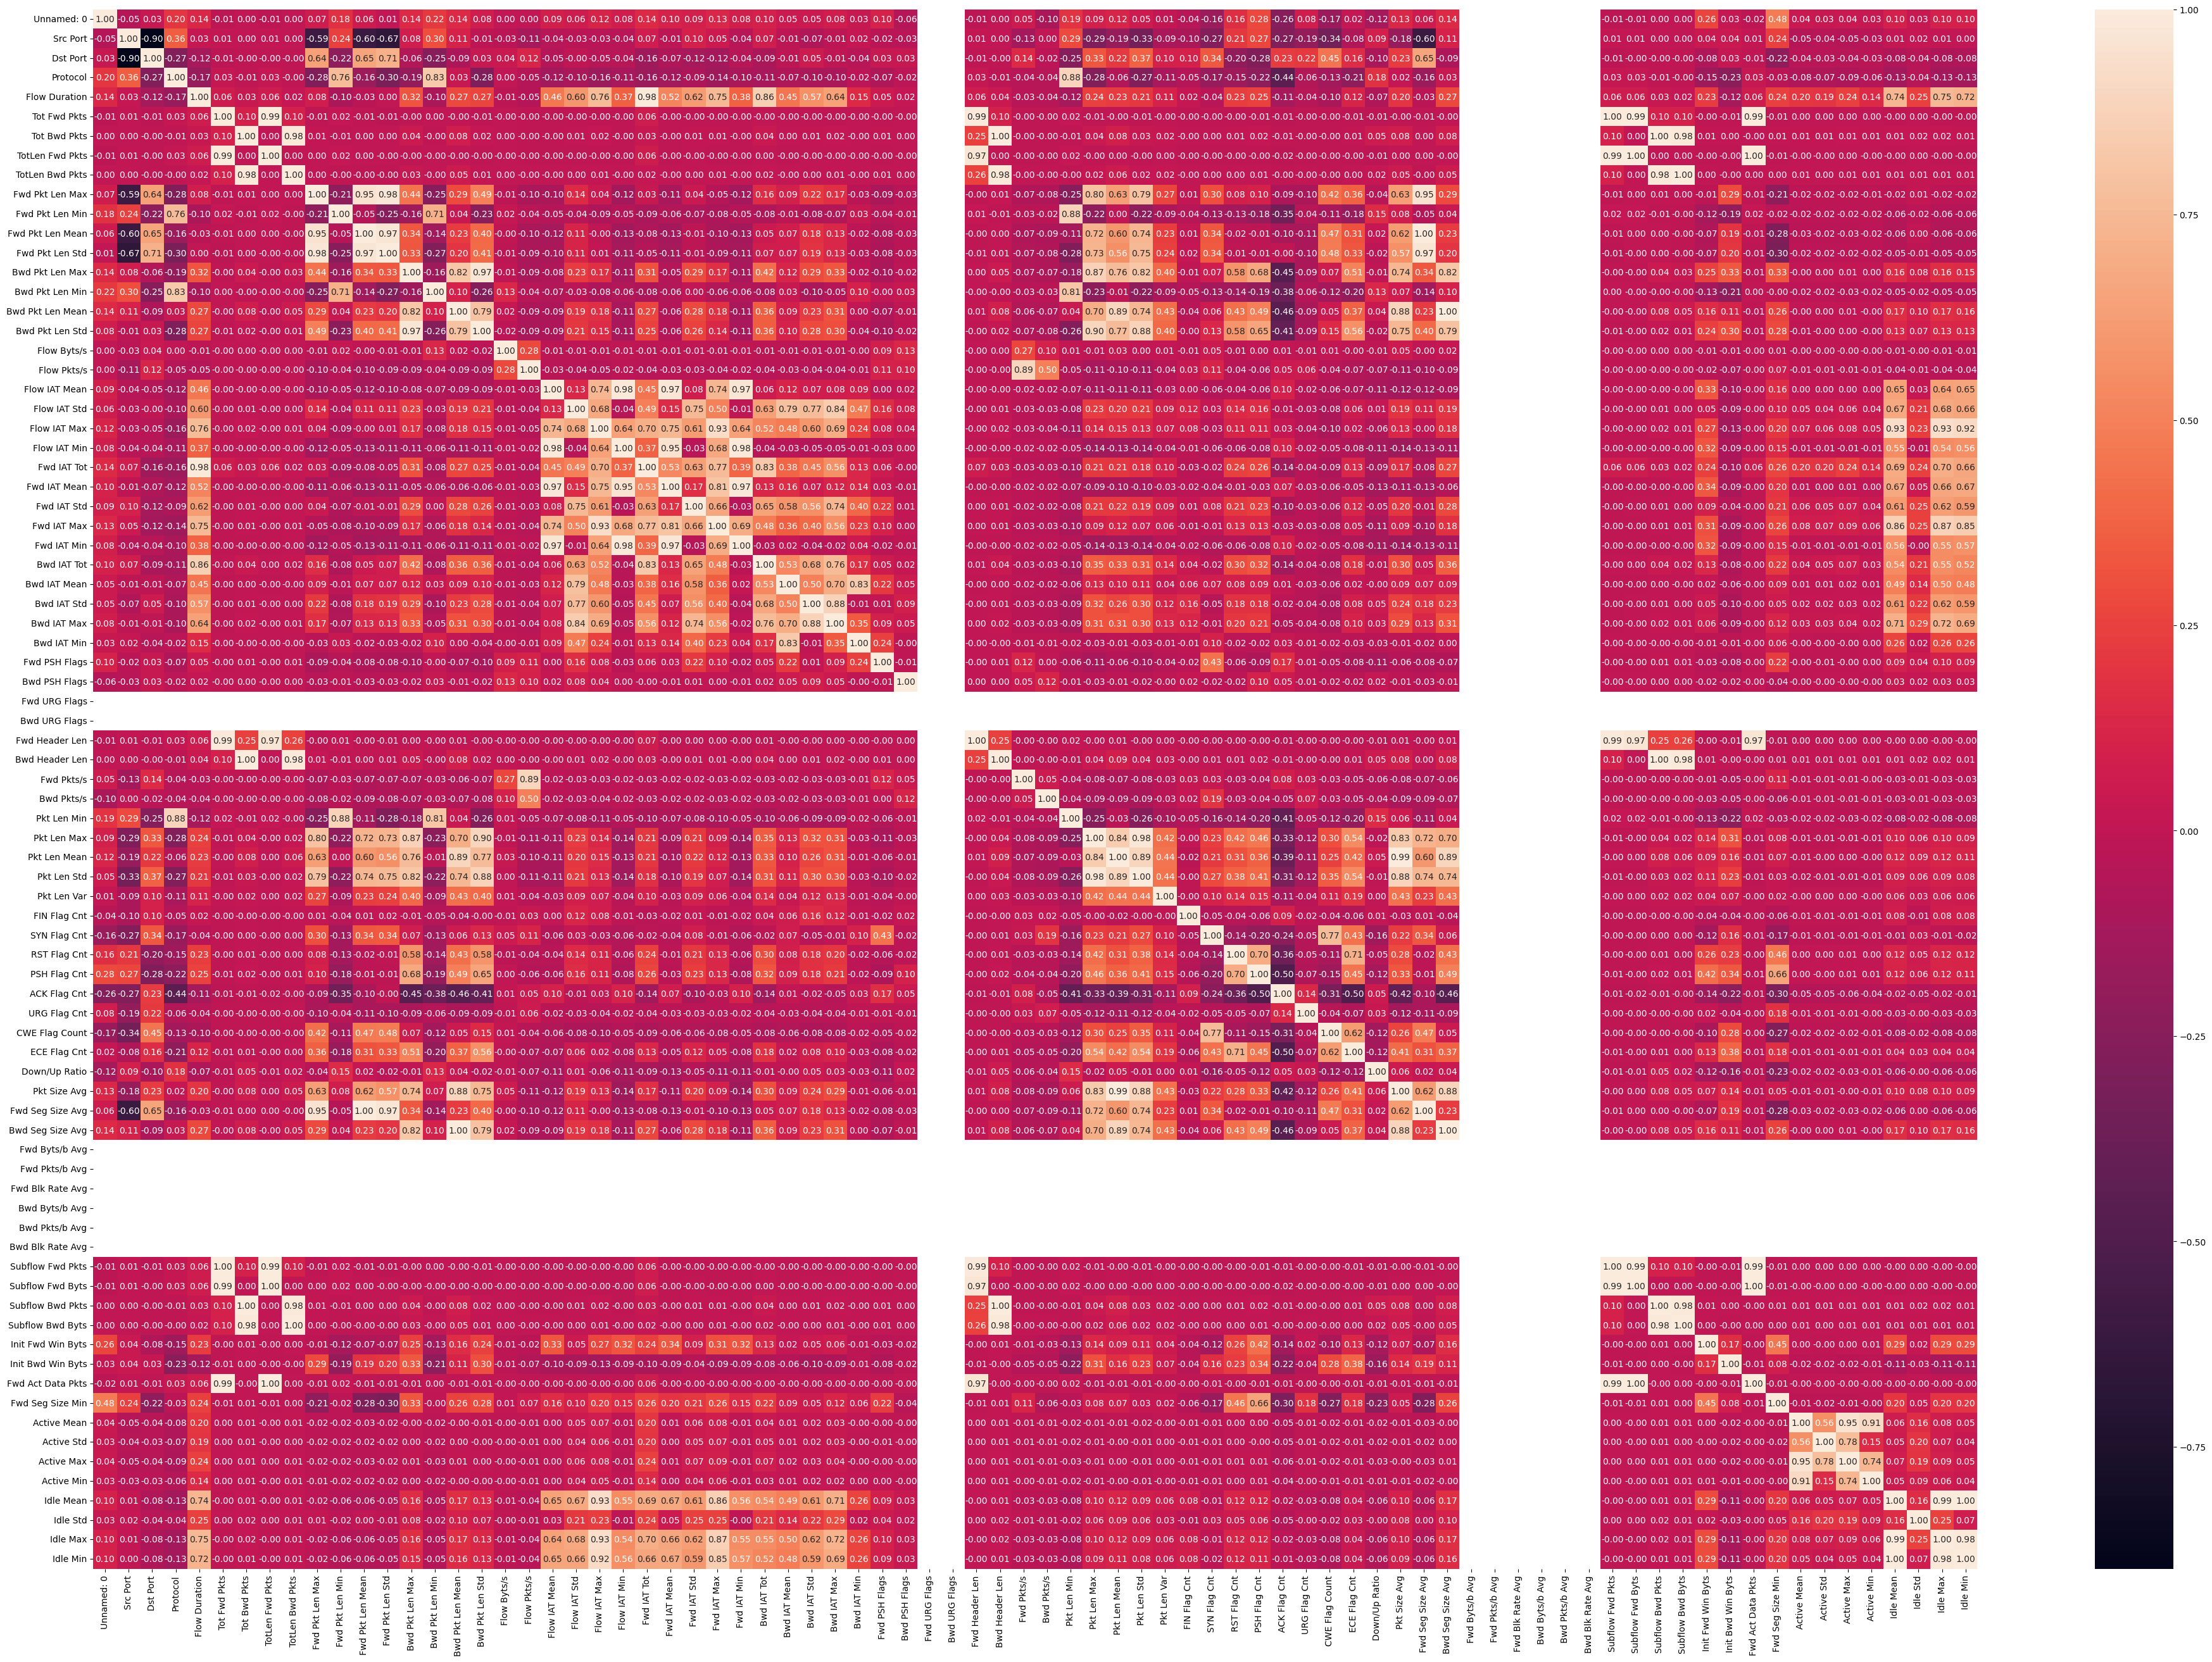

In [7]:
# Correlation matrix

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(48, 32))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


# Correlation of features with the target variable (if it's numeric)
# print(corr_matrix["Your_Target_Variable"].sort_values(ascending=False))


In [ ]:
# Histograms for numerical data

numerical_columns = df.select_dtypes(include=['number']).columns

# Set the number of bins and figsize as per your preference
bins = 10
figsize = (10, 6)

# Loop through each numerical column and create a histogram
for column in numerical_columns:
    plt.hist(df[column], bins=bins)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.show()

In [17]:
# Feature Engineering : Dropping columns with unique values and irrelevant columns

# Informing about the original shape of the DataFrame
print(f"Original DataFrame shape: {df.shape}")

# Dropping the first two columns
df = df.iloc[:, 2:]
print("\nFirst two columns dropped.")
print(f"DataFrame shape after dropping first two columns: {df.shape}")

# Finding columns with only one unique value
columns_with_single_value = df.columns[df.nunique() <= 1]
print("\nColumns with only one unique value (to be dropped):")
print(columns_with_single_value.tolist())

# Dropping columns with only one unique value
df = df.drop(columns=columns_with_single_value)
print("\nColumns with single unique value dropped.")
print(f"DataFrame shape after dropping these columns: {df.shape}")

# Displaying the first few rows of the modified DataFrame
print("\nModified DataFrame (first 5 rows):")
print(df.head())

Original DataFrame shape: (12794627, 85)

First two columns dropped.
DataFrame shape after dropping first two columns: (12794627, 83)

Columns with only one unique value (to be dropped):
['Fwd URG Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']

Columns with single unique value dropped.
DataFrame shape after dropping these columns: (12794627, 75)

Modified DataFrame (first 5 rows):
          Src IP  Src Port        Dst IP  Dst Port  Protocol  \
0  192.168.4.118      4504  203.73.24.75        80         6   
1  192.168.4.118      4504  203.73.24.75        80         6   
2  192.168.4.118      4505  203.73.24.75        80         6   
3  192.168.4.118      4505  203.73.24.75        80         6   
4  192.168.4.118      4506  203.73.24.75        80         6   

                Timestamp  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0  12/06/2010 08:34:32 AM        3974862            29            44 

In [18]:
# Feature Engineering : Timestamp column extraction

# Function to parse timestamps
def parse_timestamp(ts):
    try:
        if 'AM' in ts or 'PM' in ts:
            return pd.to_datetime(ts, format='%d/%m/%Y %I:%M:%S %p')
        else:
            return pd.to_datetime(ts, format='%d/%m/%Y %H:%M:%S')
    except:
        return pd.NaT  # Return Not a Time for unparseable timestamps

# Apply the function to the Timestamp column
df['Parsed_Timestamp'] = df['Timestamp'].apply(parse_timestamp)

# Check if there are any NaT values which indicates parsing errors
nat_count = df['Parsed_Timestamp'].isna().sum()
if nat_count > 0:
    print(f"There are {nat_count} rows with unparseable timestamps.")
else:
    # Extract date components
    df['Year'] = df['Parsed_Timestamp'].dt.year
    df['Month'] = df['Parsed_Timestamp'].dt.month
    df['Day'] = df['Parsed_Timestamp'].dt.day

    # Extract time components
    df['Hour'] = df['Parsed_Timestamp'].dt.hour
    df['Minute'] = df['Parsed_Timestamp'].dt.minute
    df['Second'] = df['Parsed_Timestamp'].dt.second

    # Day of the week (Monday=0, Sunday=6)
    df['Day_of_Week'] = df['Parsed_Timestamp'].dt.dayofweek

    # Weekend or Weekday
    df['Is_Weekend'] = df['Day_of_Week'].apply(lambda x: 1 if x > 4 else 0)

    # Display the first few rows of the modified DataFrame
    print("Parsed Timestamps and Extracted Components:")
    print(df.head())

    df = df.drop(columns=['Parsed_Timestamp'])

    # Drop the original 'Timestamp' column as all timestamps are parsed successfully
    df.drop(columns='Timestamp', inplace=True)
    print("\nOriginal 'Timestamp' column dropped as all timestamps were parsed successfully.")

Parsed Timestamps and Extracted Components:
          Src IP  Src Port        Dst IP  Dst Port  Protocol  \
0  192.168.4.118      4504  203.73.24.75        80         6   
1  192.168.4.118      4504  203.73.24.75        80         6   
2  192.168.4.118      4505  203.73.24.75        80         6   
3  192.168.4.118      4505  203.73.24.75        80         6   
4  192.168.4.118      4506  203.73.24.75        80         6   

                Timestamp  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0  12/06/2010 08:34:32 AM        3974862            29            44   
1  12/06/2010 08:34:36 AM             63             1             1   
2  12/06/2010 08:34:36 AM         476078             2             6   
3  12/06/2010 08:34:37 AM            151             2             1   
4  12/06/2010 08:34:37 AM         472507             2             5   

   TotLen Fwd Pkts  ...  Label    Parsed_Timestamp  Year  Month  Day  Hour  \
0             86.0  ...   ddos 2010-06-12 08:34:32  2010    

In [20]:
# Printing the first 100 samples

# Select the first 100 samples
subset_data = df.head(100)


# Save this subset to a new CSV file
subset_data.to_csv('first_100_samples.csv', index=False)

In [21]:
# Feature Engineering : Label Encoding

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Label' column
df['Label_encoded'] = label_encoder.fit_transform(df['Label'])

# Get unique categories found in the DataFrame
unique_categories = df['Label'].unique()

# Display progress message
print("Processing categories:")

# Loop through unique categories
for category in unique_categories:
    # Filter DataFrame for the current category
    category_df = df[df['Label'] == category]
    
    # Get the number of samples in the category
    num_samples = category_df.shape[0]
    
    # Limit the number of samples to display to 10 or fewer
    num_samples_to_display = min(10, num_samples)
    
    # Display category name and number of samples
    print(f"\nCategory: {category} ({num_samples} samples)")
    
    # Select the first 10 samples (or fewer if there are fewer than 10)
    selected_samples = category_df.head(num_samples_to_display)
    
    # Display original 'Label' column for selected samples
    print("\nOriginal 'Label' Column:")
    print(selected_samples[['Label']])
    
    # Display encoded 'Label_encoded' column for selected samples
    print("\nEncoded 'Label_encoded' Column:")
    print(selected_samples[['Label_encoded']])
    
# Display completion message
print("\nProcessing completed.")
print(df.head())

Processing categories:

Category: ddos (6472647 samples)

Original 'Label' Column:
  Label
0  ddos
1  ddos
2  ddos
3  ddos
4  ddos
5  ddos
6  ddos
7  ddos
8  ddos
9  ddos

Encoded 'Label_encoded' Column:
   Label_encoded
0              1
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1

Category: Benign (6321980 samples)

Original 'Label' Column:
          Label
6472647  Benign
6472648  Benign
6472649  Benign
6472650  Benign
6472651  Benign
6472652  Benign
6472653  Benign
6472654  Benign
6472655  Benign
6472656  Benign

Encoded 'Label_encoded' Column:
         Label_encoded
6472647              0
6472648              0
6472649              0
6472650              0
6472651              0
6472652              0
6472653              0
6472654              0
6472655              0
6472656              0

Processing completed.
          Src IP  Src Port        Dst IP  Dst Port  Protocol  

In [22]:
# Feature Engineering : Drop the original Label column

# Drop the original 'Label' column
df = df.drop(columns=['Label'])
print(df.head())

          Src IP  Src Port        Dst IP  Dst Port  Protocol  Flow Duration  \
0  192.168.4.118      4504  203.73.24.75        80         6        3974862   
1  192.168.4.118      4504  203.73.24.75        80         6             63   
2  192.168.4.118      4505  203.73.24.75        80         6         476078   
3  192.168.4.118      4505  203.73.24.75        80         6            151   
4  192.168.4.118      4506  203.73.24.75        80         6         472507   

   Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  ...  \
0            29            44             86.0          59811.0  ...   
1             1             1              0.0              0.0  ...   
2             2             6             86.0           3037.0  ...   
3             2             1              0.0              0.0  ...   
4             2             5             73.0           1050.0  ...   

   Idle Min  Year  Month  Day  Hour  Minute  Second  Day_of_Week  Is_Weekend  \
0       0.0 

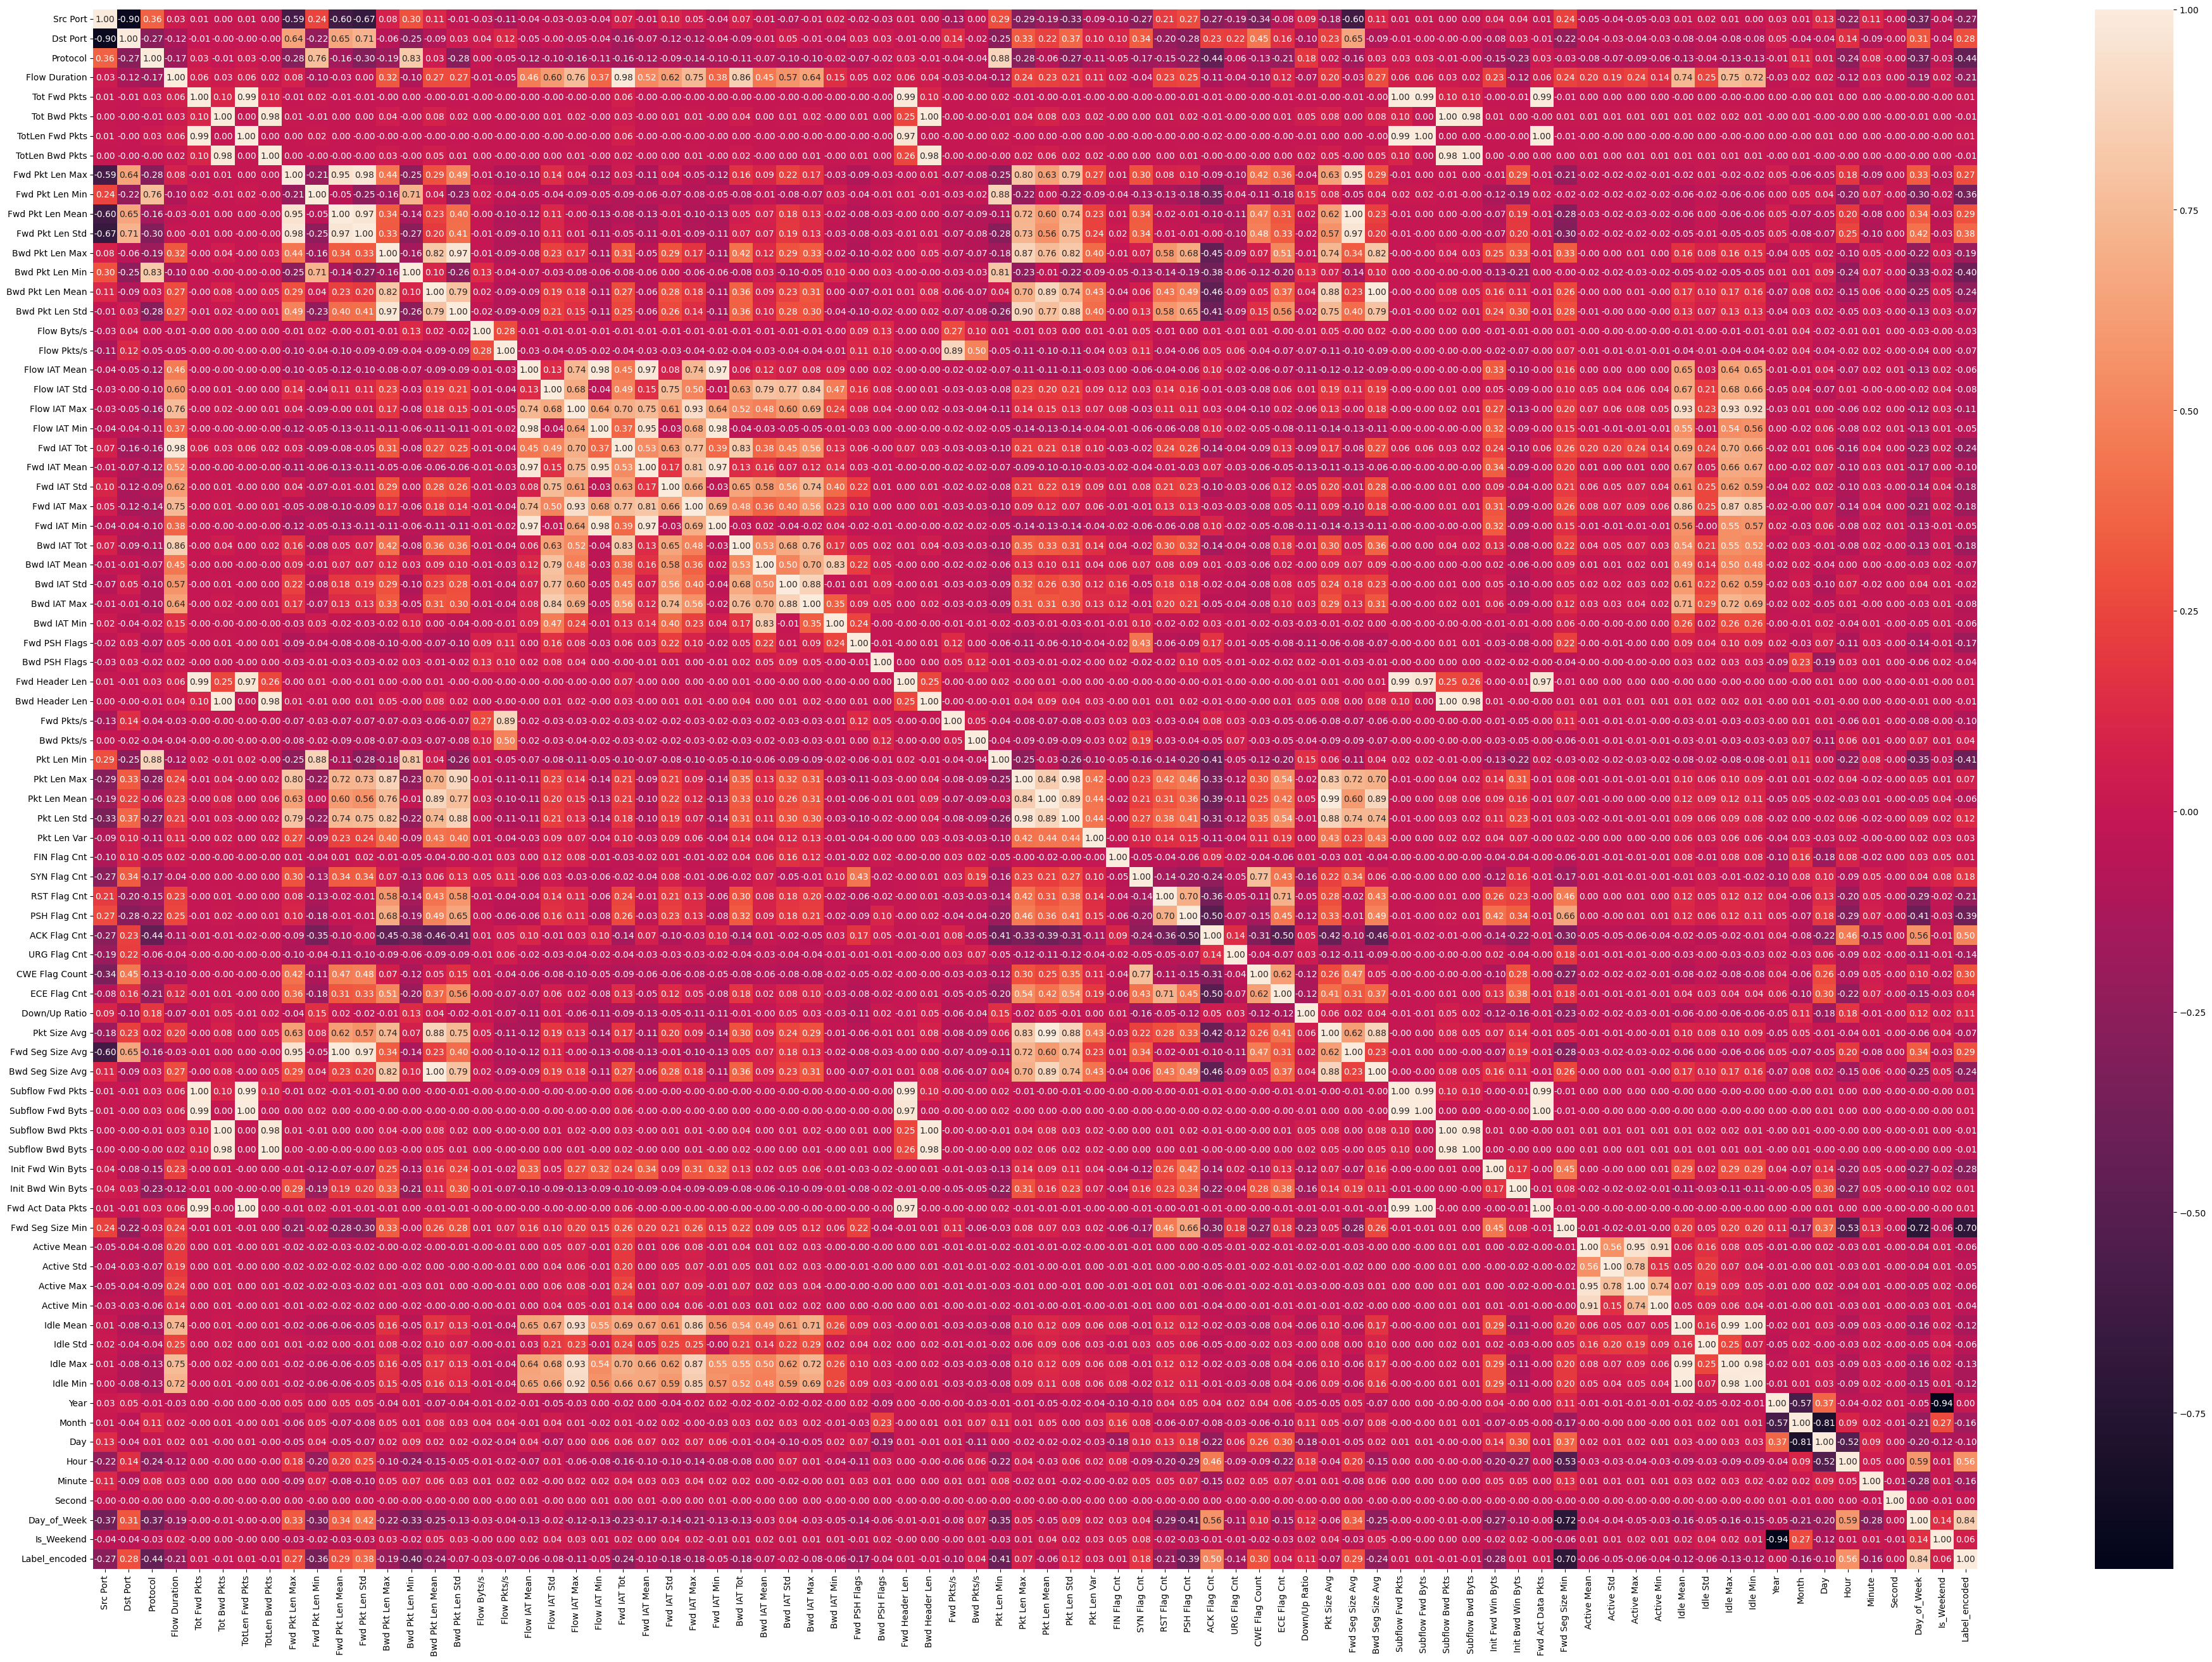

In [23]:
# Correlation matrix #2

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(48, 32))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [ ]:
# Histograms for numerical data #2

numerical_columns = df.select_dtypes(include=['number']).columns

# Set the number of bins and figsize as per your preference
bins = 10
figsize = (10, 6)

# Loop through each numerical column and create a histogram
for column in numerical_columns:
    plt.hist(df[column], bins=bins)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.show()

In [45]:
# Split the data 

# Separate features and label
X = df2.drop('Label_encoded', axis=1)  # Features
y = df2['Label_encoded']  # Label
print("Features and label separated.")

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Dataset split into training and testing sets.")

# Output the results of the split
print(f"Training Set Shape: {x_train.shape}, Testing Set Shape: {x_test.shape}")
print(f"Training Set Label Distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing Set Label Distribution:\n{y_test.value_counts(normalize=True)}")


Features and label separated.
Dataset split into training and testing sets.
Training Set Shape: (8956238, 79), Testing Set Shape: (3838389, 79)
Training Set Label Distribution:
Label_encoded
1    0.505888
0    0.494112
Name: proportion, dtype: float64
Testing Set Label Distribution:
Label_encoded
1    0.505888
0    0.494112
Name: proportion, dtype: float64


In [42]:
df2=df.copy()



In [44]:
df2 = df2.drop(columns=['Src IP', 'Dst IP'])

In [46]:
# Model Preparation

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Evaluate the initial model
initial_predictions = rf.predict(x_test)
print("Initial Model Accuracy:", accuracy_score(y_test, initial_predictions))
print("Classification Report:\n", classification_report(y_test, initial_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, initial_predictions))

# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='recall')
grid_search.fit(x_train, y_train)

# Evaluate the tuned model
best_rf = grid_search.best_estimator_
tuned_predictions = best_rf.predict(x_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, tuned_predictions))
print("Classification Report:\n", classification_report(y_test, tuned_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, tuned_predictions))
print("Best Parameters:", grid_search.best_params_)